# **Fish Analysis** 🐟🐠
`context`: Dataset recording various measurements of 7 different species of fish at a fish market. Predictive models can be used to predict weight, species, etc.

| **Attribute** | **Description** |  
|-------------|----------------|  
| **Species** | Species name of the fish |  
| **Weight**   | Weight of the fish in grams |  
| **Length1** (Standard Length) | Vertical length in cm |  
| **Length2** (Forked Length) | Diagonal length in cm |  
| **Length3** (Total Length) | Cross length in cm |  
| **Height**   | Height in cm from dorsal to the bottom thin |  
| **Width**    | Width in cm, thickness of the body |  

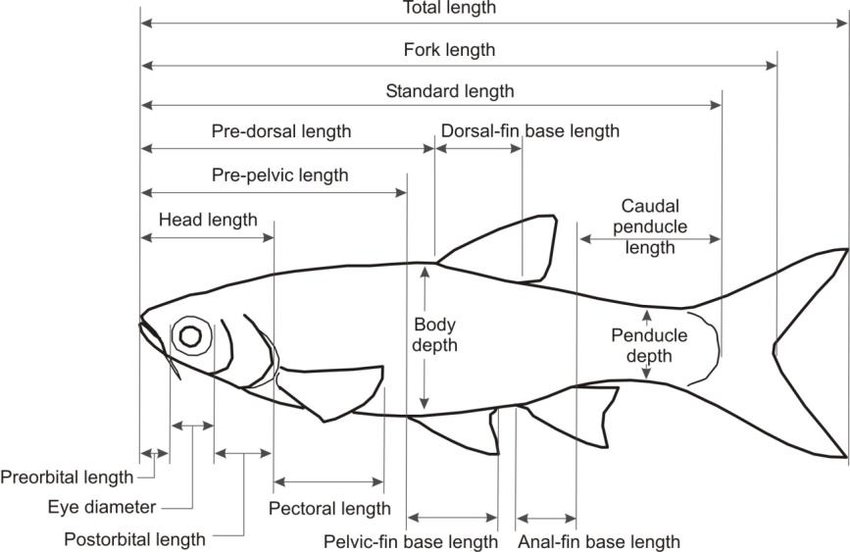


**Exploratory Data Analysis:**
1. Univariate:
   - Check Value of each column
   - analysis big fish from width
   - distribution of each column
   - 
  
2. Multivariate
   - Heatmap
   - Show the pattern or cluster with best correlation

**Preprocessing:**
- Handling inconcistencies
- Feature selection
- Feature scaling (corr, variance, MI)
- Cross-validation

**Modelling**
- Distances
- KNN
- Scenarios
- Confidence interval
- Visualization
- New instance

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('dataset\Fish.csv')
df_clean = df.copy()

this is the first 5 rows of the dataset

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape 

(159, 7)

there are 159 instances and 7 features (one of it is a class)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


the dataset is **dominated** with `numeric` cols with float dtype, the species is the only `object` col

In [6]:
numeric_desc = df.describe().T 
numeric_desc['nunique'] = [ df[col].nunique() for col in df.drop('Species', axis=1).columns ]
numeric_desc

,count,mean,std,min,25%,50%,75%,max,nunique
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000,101
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000,116
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400,93
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000,124
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957,154
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142,152


`Weight`: 
- has the **biggest std** and **magnitude**, the `min is 0 gram`, that's not logical, \
- while the max is 1650 (1.6 kg) the haviest fish in the data \

`Lengths`: 
- length 1, 2, 3 is **orderly increasing** because they're the sign of the `standard` to `total` length \

`Height`: 
- the smallest is 1 cm, biggest is 18 cm \

`Width`: 
- the `thickest` is 8 cm \

- The fishes are around **small** to **medium size**
- The nunique is near to the total instances, meaning the **characteristics** of each data is unique

In [7]:
df.describe(include='object').T 

,count,unique,top,freq
Species,159,7,Perch,56


In [8]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

there are 7 species of fish in this dataset, `Perch` dominated the data

In [9]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

this is the distribution of the species

In [10]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

great no missing values

In [11]:
df.duplicated().sum()

0

no duplication!

In [12]:
numerical_data = df.select_dtypes(include='number').columns 

In [13]:
plt.rcParams['figure.figsize'] = (20, 15)

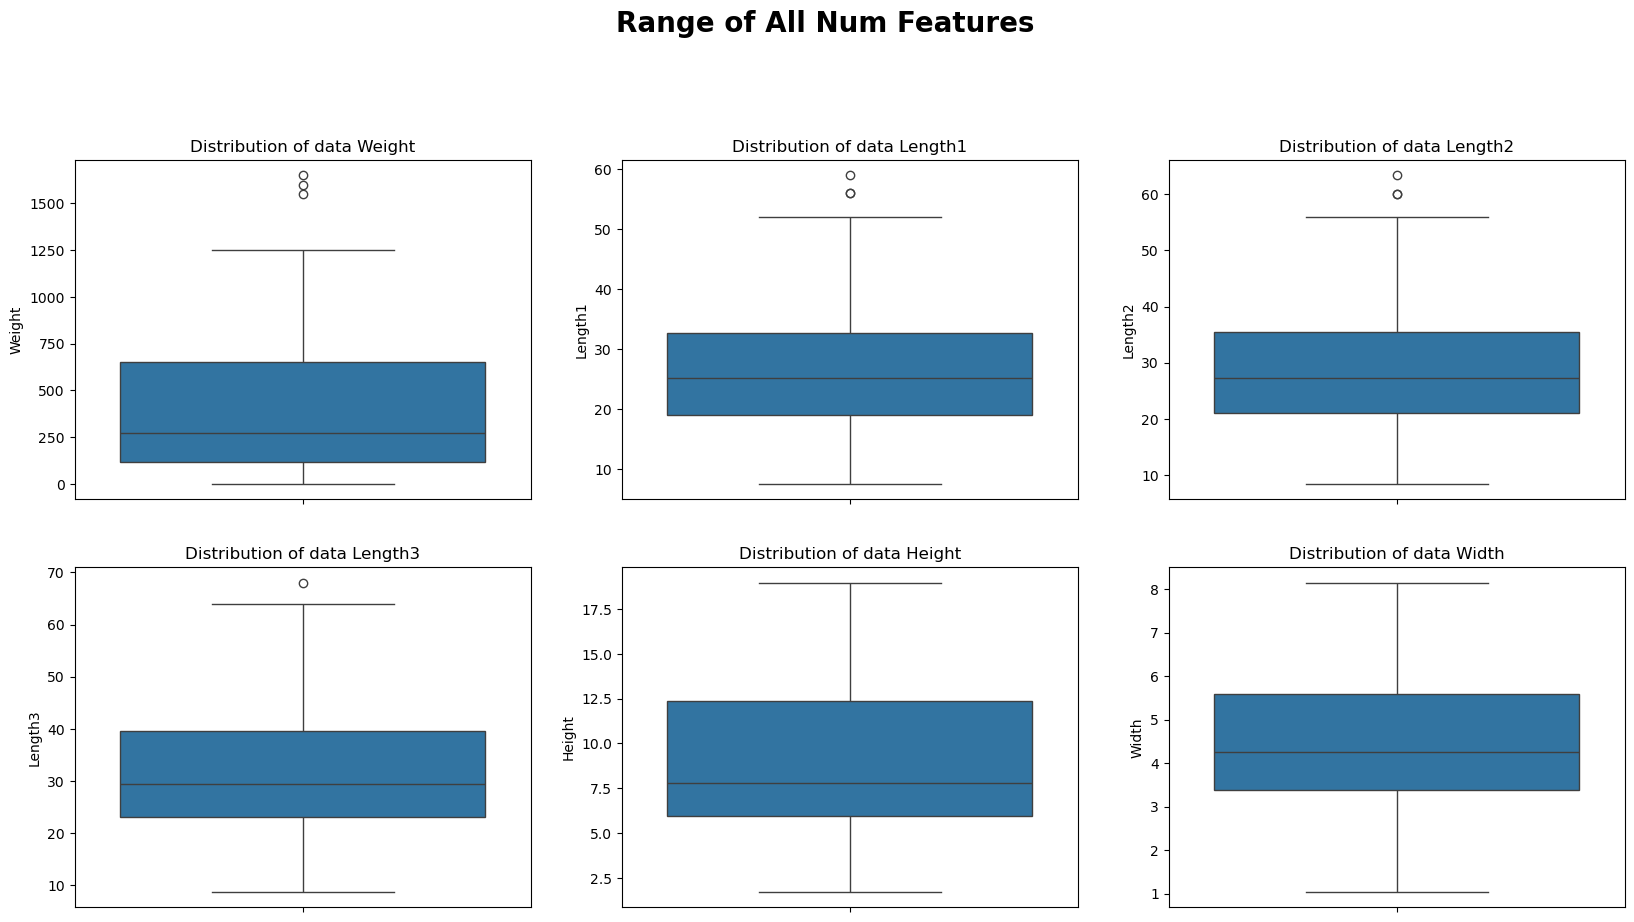

In [14]:
for i, col in enumerate(numerical_data):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(f"Distribution of data {col}")
plt.suptitle('Range of All Num Features', size=20, weight='bold')
plt.show()

based on this, there are some outliers present in `weight` and `lengths`, let's  calc how many are they

In [15]:
def iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1 
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[ (data < lower) | (data > upper) ]
    return outliers 

def zscore(data):
    zscores = (data - data.mean()) / data.std()
    outliers = zscores[(zscores < -3) | (zscores > 3)]
    return outliers 

In [16]:
indices_outliers = []
for col in numerical_data:
    iqr_outliers = iqr(df[col])
    zscore_outliers = zscore(df[col])
    indices = iqr_outliers.index 
    indices_outliers.append(indices.tolist())
    print(col)
    print(f'{len(iqr_outliers)} Outliers in {col} (IQR)')
    print(f'{len(zscore_outliers)} Outliers in {col} (Zscore)')

Weight
3 Outliers in Weight (IQR)
3 Outliers in Weight (Zscore)
Length1
3 Outliers in Length1 (IQR)
1 Outliers in Length1 (Zscore)
Length2
3 Outliers in Length2 (IQR)
1 Outliers in Length2 (Zscore)
Length3
1 Outliers in Length3 (IQR)
1 Outliers in Length3 (Zscore)
Height
0 Outliers in Height (IQR)
0 Outliers in Height (Zscore)
Width
0 Outliers in Width (IQR)
0 Outliers in Width (Zscore)


In [17]:
unique_indices = set([index for index_list in indices_outliers for index in index_list])
unique_indices

{142, 143, 144}

In [18]:
percentage = len(unique_indices) / len(df) * 100
print(f'Percentage of outliers in the row {round(percentage, 2)}%')

Percentage of outliers in the row 1.89%


zscore tend to have lower outliers this is because it uses std, while iqr uses range, let's handle it with IQR instead

`consideration`:
1. They are only small amount, 2 percent, it wouldn't really effect the model
2. although zscore is often used for classification, since it's small amount, using iqr is not big deal

In [19]:
for col in numerical_data:
    iqr_outliers = iqr(df_clean[col])
    indices = iqr_outliers.index
    print(col)
    print(f'{len(iqr_outliers)} Outliers in {col} (before)')
    for type in np.unique(df_clean['Species']):
        filtered = df_clean.loc[indices]
        filtered = filtered[filtered['Species'] == type]
        if len(filtered) == 0:
            continue
        median = df_clean.loc[df_clean['Species'] == type, col].median()
        updated_indices = filtered.index 
        df_clean.loc[updated_indices, col] = median
    iqr_outliers = iqr(df_clean[col])
    print(f'{len(iqr_outliers)} Outliers in {col} (after)')

Weight
3 Outliers in Weight (before)
0 Outliers in Weight (after)
Length1
3 Outliers in Length1 (before)
0 Outliers in Length1 (after)
Length2
3 Outliers in Length2 (before)
0 Outliers in Length2 (after)
Length3
1 Outliers in Length3 (before)
0 Outliers in Length3 (after)
Height
0 Outliers in Height (before)
0 Outliers in Height (after)
Width
0 Outliers in Width (before)
0 Outliers in Width (after)


the method is by `imputing` the missing cell with the `median` of the `feature` based on the **class characteristic**

### Handling 0 weight

In [20]:
display(df[df['Weight'] == 0])
df.loc[40, 'Weight'] = df.loc[df['Species'] == 'Roach', 'Weight'].median()
df_clean.loc[40, 'Weight'] = df_clean.loc[df_clean['Species'] == 'Roach', 'Weight'].median()
display(df.iloc[40])

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


Species     Roach
Weight      147.5
Length1      19.0
Length2      20.5
Length3      22.8
Height     6.4752
Width      3.3516
Name: 40, dtype: object

In [21]:
numerical_data = df.select_dtypes(include='float64')

In [22]:
plt.rcParams['figure.figsize'] = (20, 15)

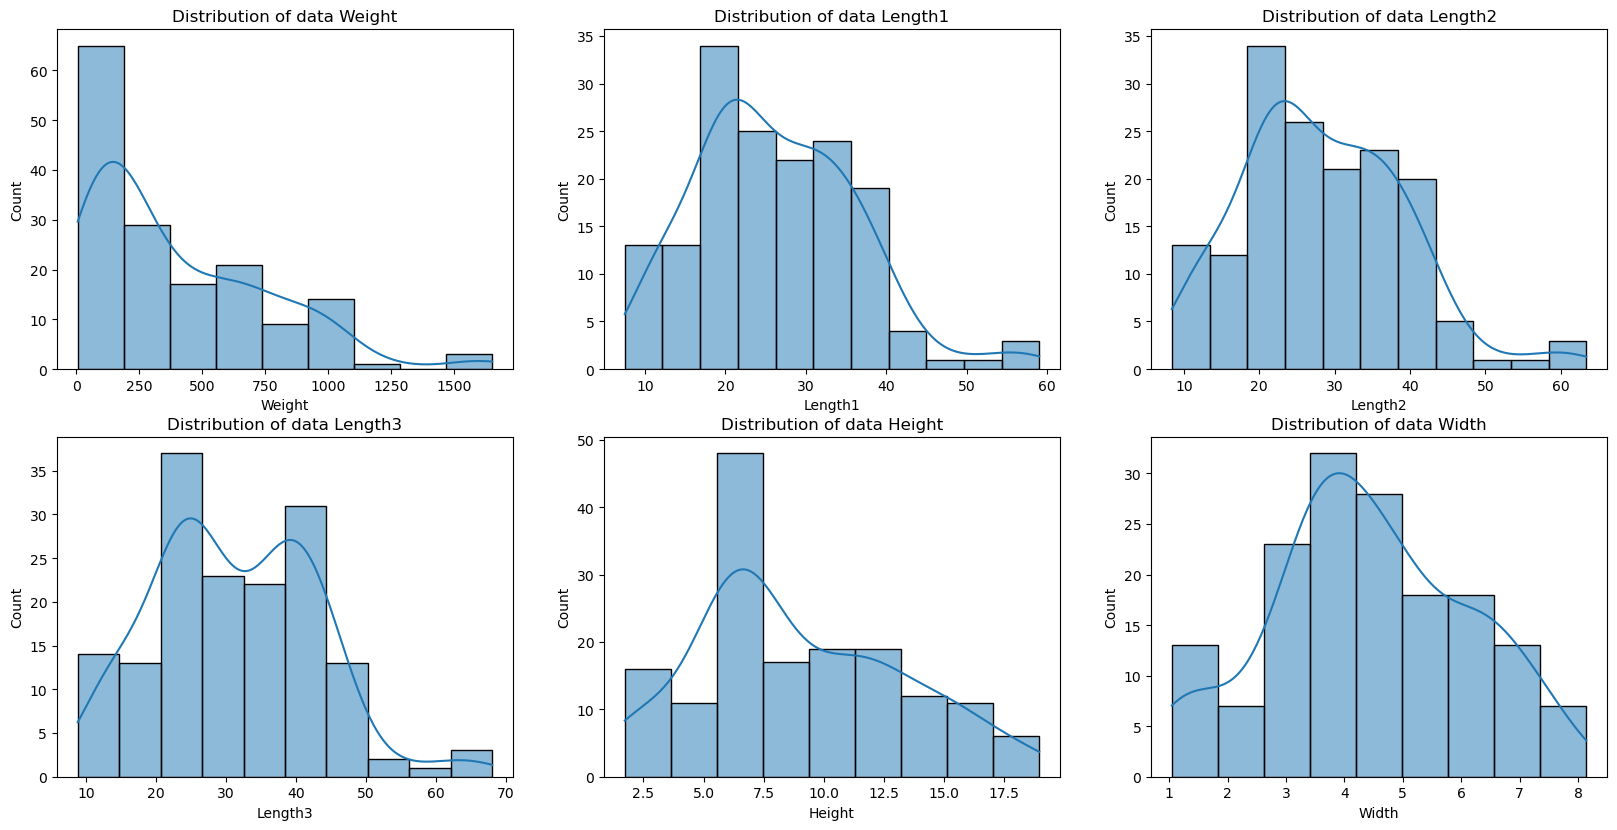

In [23]:
for i, col in enumerate(numerical_data):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of data {col}")
    

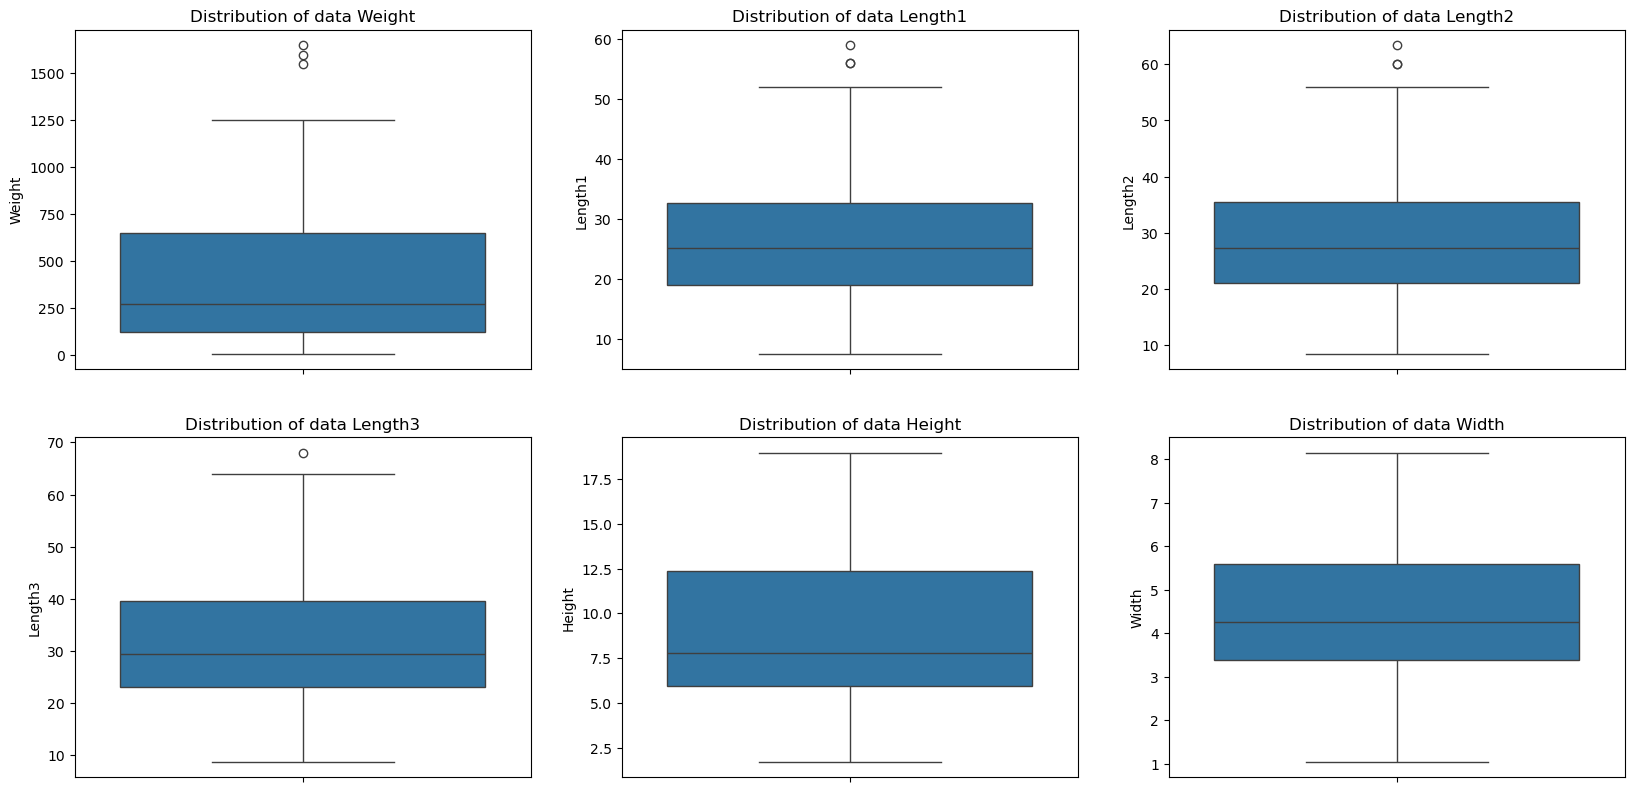

In [24]:
for i, col in enumerate(numerical_data):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(f"Distribution of data {col}")
    

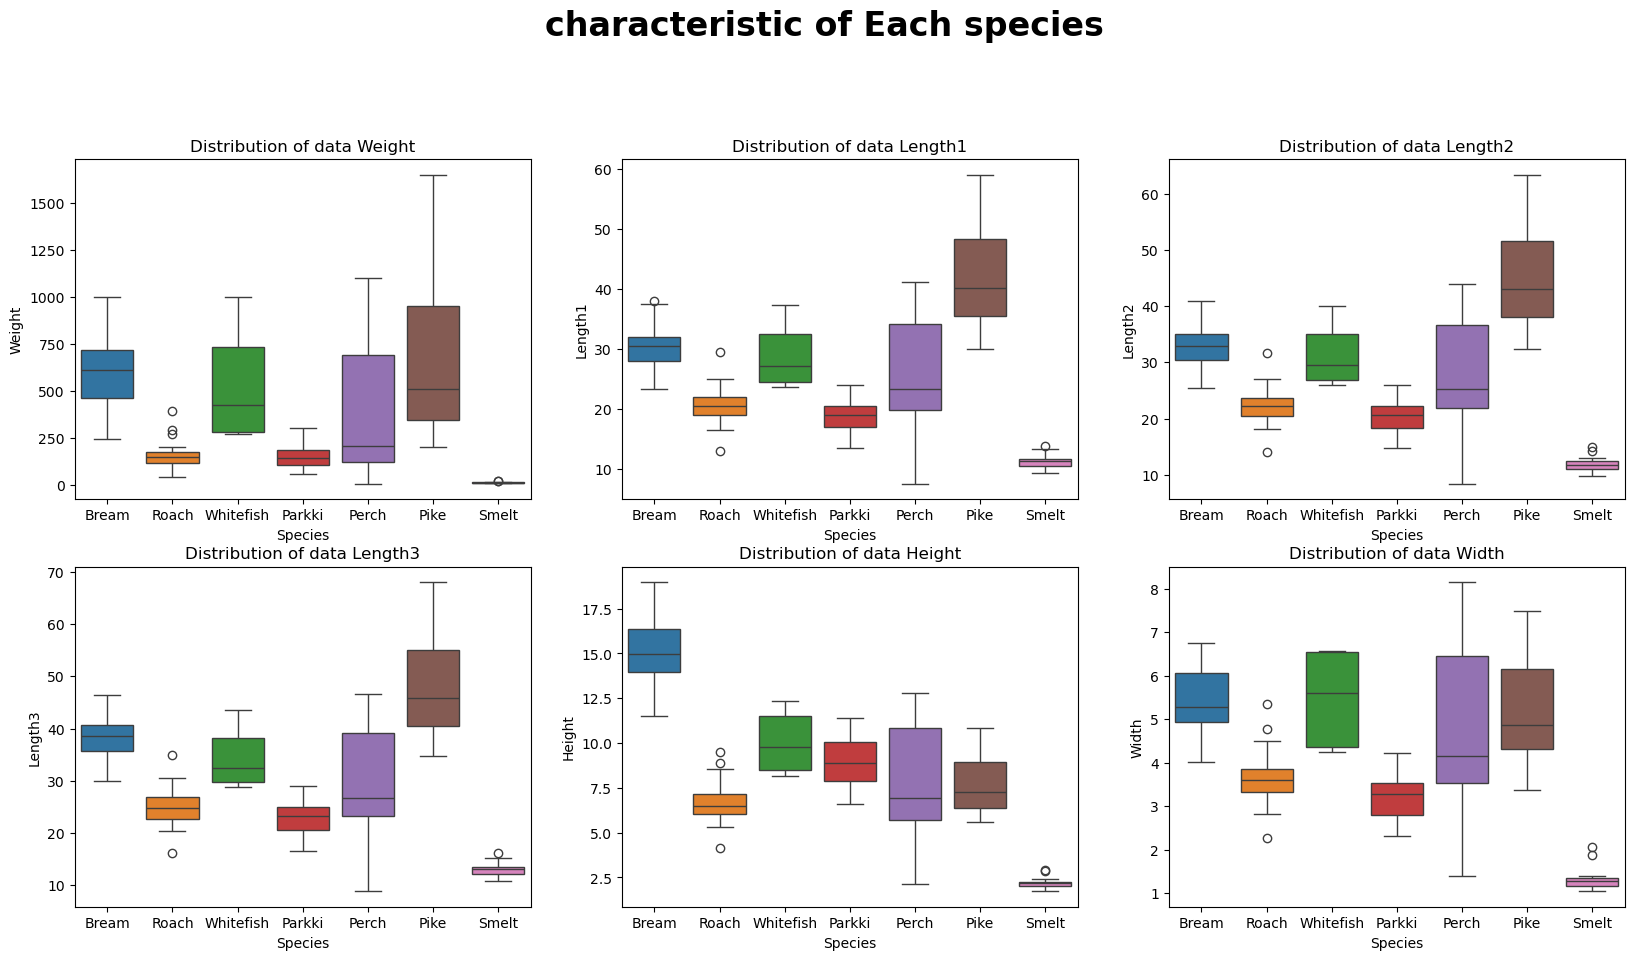

In [25]:
for i, col in enumerate(numerical_data):
    plt.subplot(3, 3, i+1)
    plt.title(f"Distribution of data {col}")
    sns.boxplot(data=df, x='Species', y=col, hue='Species')
plt.suptitle(f'characteristic of Each species', size=24, weight='bold')
plt.show()
    

**Hightlight of characteristic📈**
- Species `Smelt` have smallest size from each feature indicate: `Smelt` species with small size

****

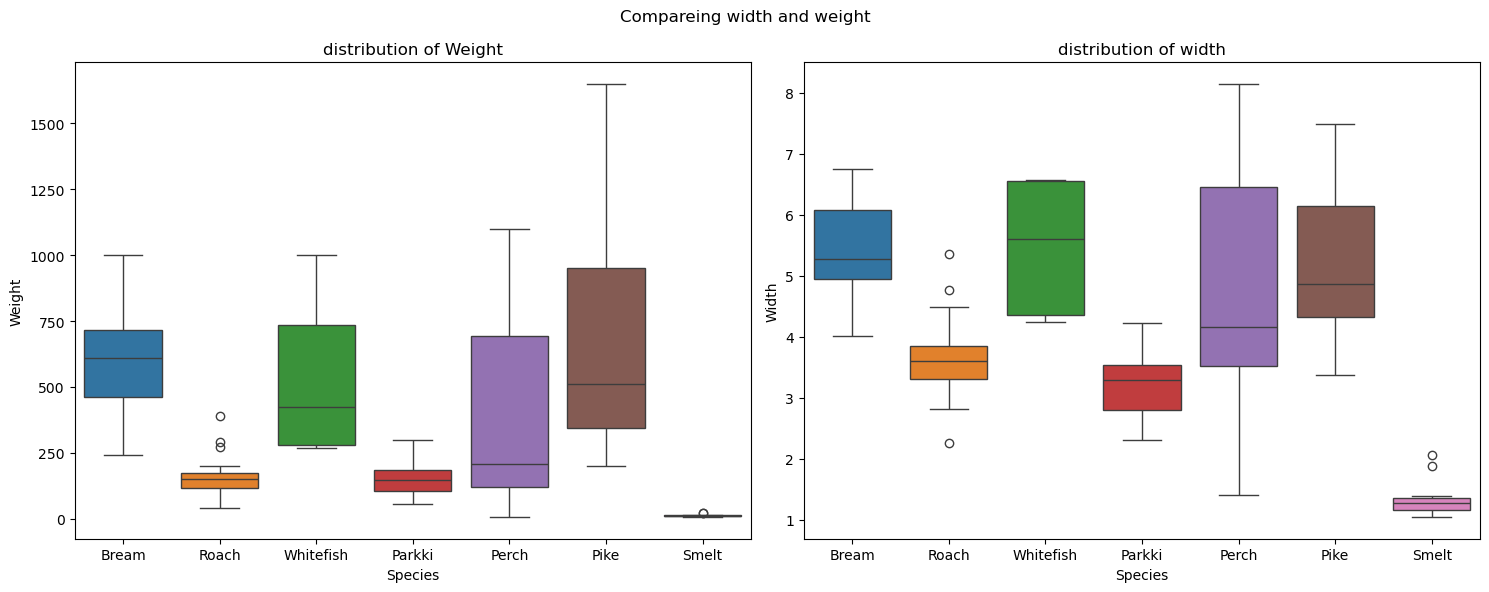

In [26]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title('distribution of Weight')
sns.boxplot(data=df, x='Species', y='Weight', hue='Species')

plt.subplot(1, 2, 2)
plt.title('distribution of width')
sns.boxplot(data=df, x='Species', y='Width', hue='Species')

plt.suptitle('Compareing width and weight')
plt.tight_layout()
plt.show()

**Charateritic Weight and Width📈**
Width and weight it should be correlate because thickness of fish will effect the weight of the 

- a `width` of fish have a trend and correlated with `weight`
- but the species of `Pike` have high weight but small width


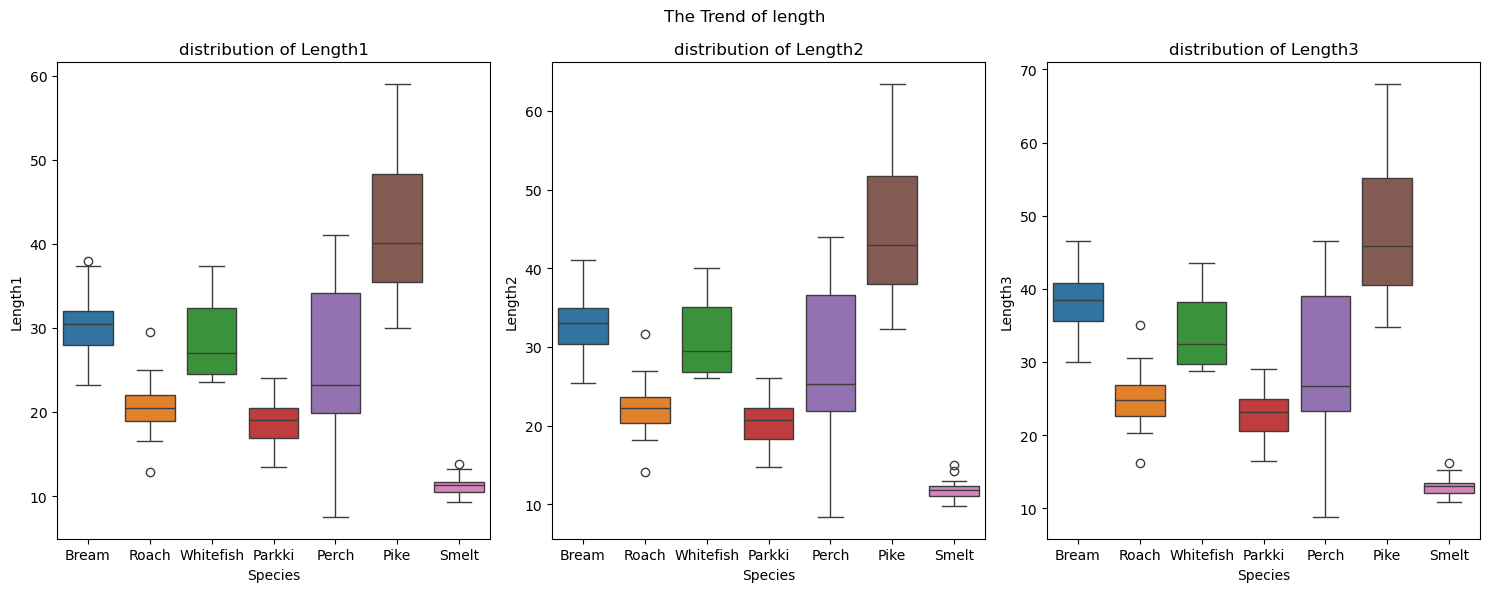

In [27]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.title('distribution of Length1')
sns.boxplot(data=df, x='Species', y='Length1', hue='Species')

plt.subplot(1, 3, 2)
plt.title('distribution of Length2')
sns.boxplot(data=df, x='Species', y='Length2', hue='Species')

plt.subplot(1, 3, 3)
plt.title('distribution of Length3')
sns.boxplot(data=df, x='Species', y='Length3', hue='Species')

plt.suptitle('The Trend of length')
plt.tight_layout()
plt.show()

**Charateritic Weight and Length📈**
- each of mearsurment of lenth have a very strong correlation and almot identical
- but the trend is upward, the more bigger length1 it will impact to length2 and length3
- we can make a ratio and make it to 1 column to have a full insight of length in 1 column at the same time

<Axes: title={'center': 'Distribution of Height'}, xlabel='Species', ylabel='Height'>

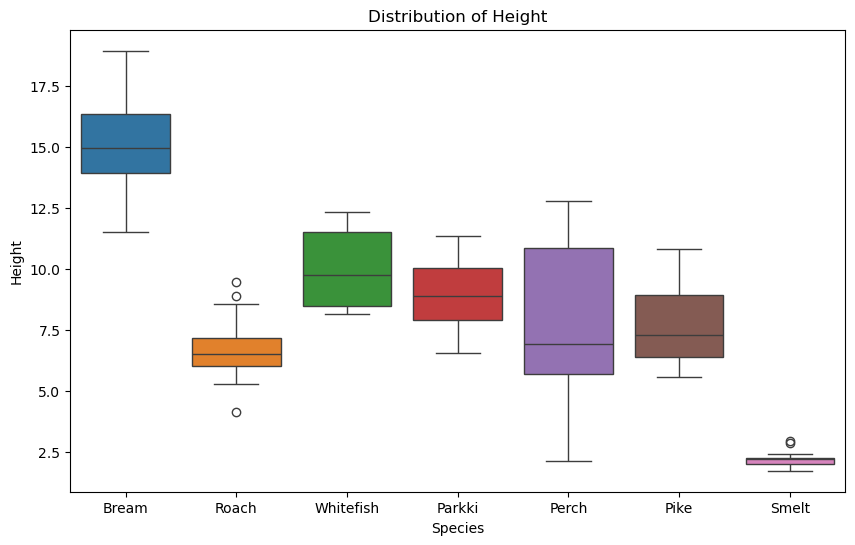

In [28]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Height')
sns.boxplot(data=df, x='Species', y='Height', hue='Species')

- species `Bream` have the tallest `height` this type of fish have a wide fin

In [29]:
df['length_ratio'] = df[['Length1', 'Length2', 'Length3']].mean(axis=1)
df['size_ratio'] = df['length_ratio'] / df['Height']
df['wide_ratio'] = df['Width'] / df['Weight'] 

In [30]:
df_clean['length_ratio'] = df_clean[['Length1', 'Length2', 'Length3']].mean(axis=1)
df_clean['size_ratio'] = df_clean['length_ratio'] / df_clean['Height']
df_clean['wide_ratio'] = df_clean['Width'] / df_clean['Weight'] 

In [31]:
df.isna().sum()

Species         0
Weight          0
Length1         0
Length2         0
Length3         0
Height          0
Width           0
length_ratio    0
size_ratio      0
wide_ratio      0
dtype: int64

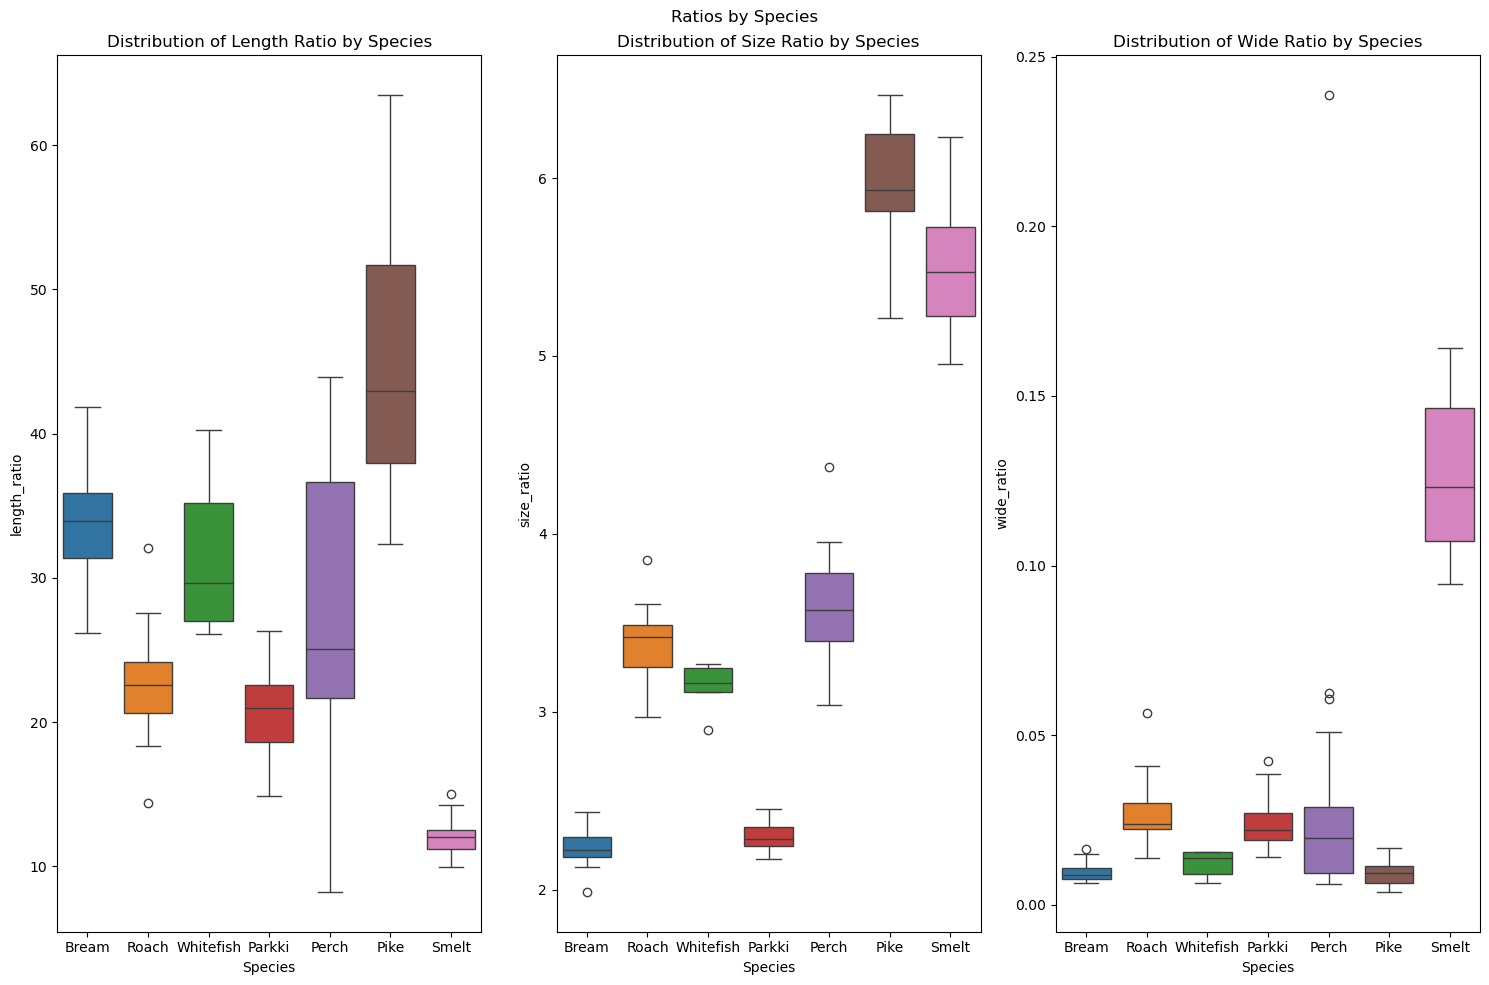

In [32]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title('Distribution of Length Ratio by Species')
sns.boxplot(data=df, x='Species', y='length_ratio', hue='Species')

plt.subplot(1, 3, 2)
plt.title('Distribution of Size Ratio by Species')
sns.boxplot(data=df, x='Species', y='size_ratio', hue='Species')

plt.subplot(1, 3, 3)
plt.title('Distribution of Wide Ratio by Species')
sns.boxplot(data=df, x='Species', y='wide_ratio', hue='Species')

plt.suptitle('Ratios by Species')
plt.tight_layout()
plt.show()

## Multivariate Analysis

In [33]:
df['Species_encoded'] = df['Species'].map({'Bream':0, 'Roach':1, 'Whitefish':2, 'Parkki':3, 'Perch':4, 'Pike':5, 'Smelt':6})

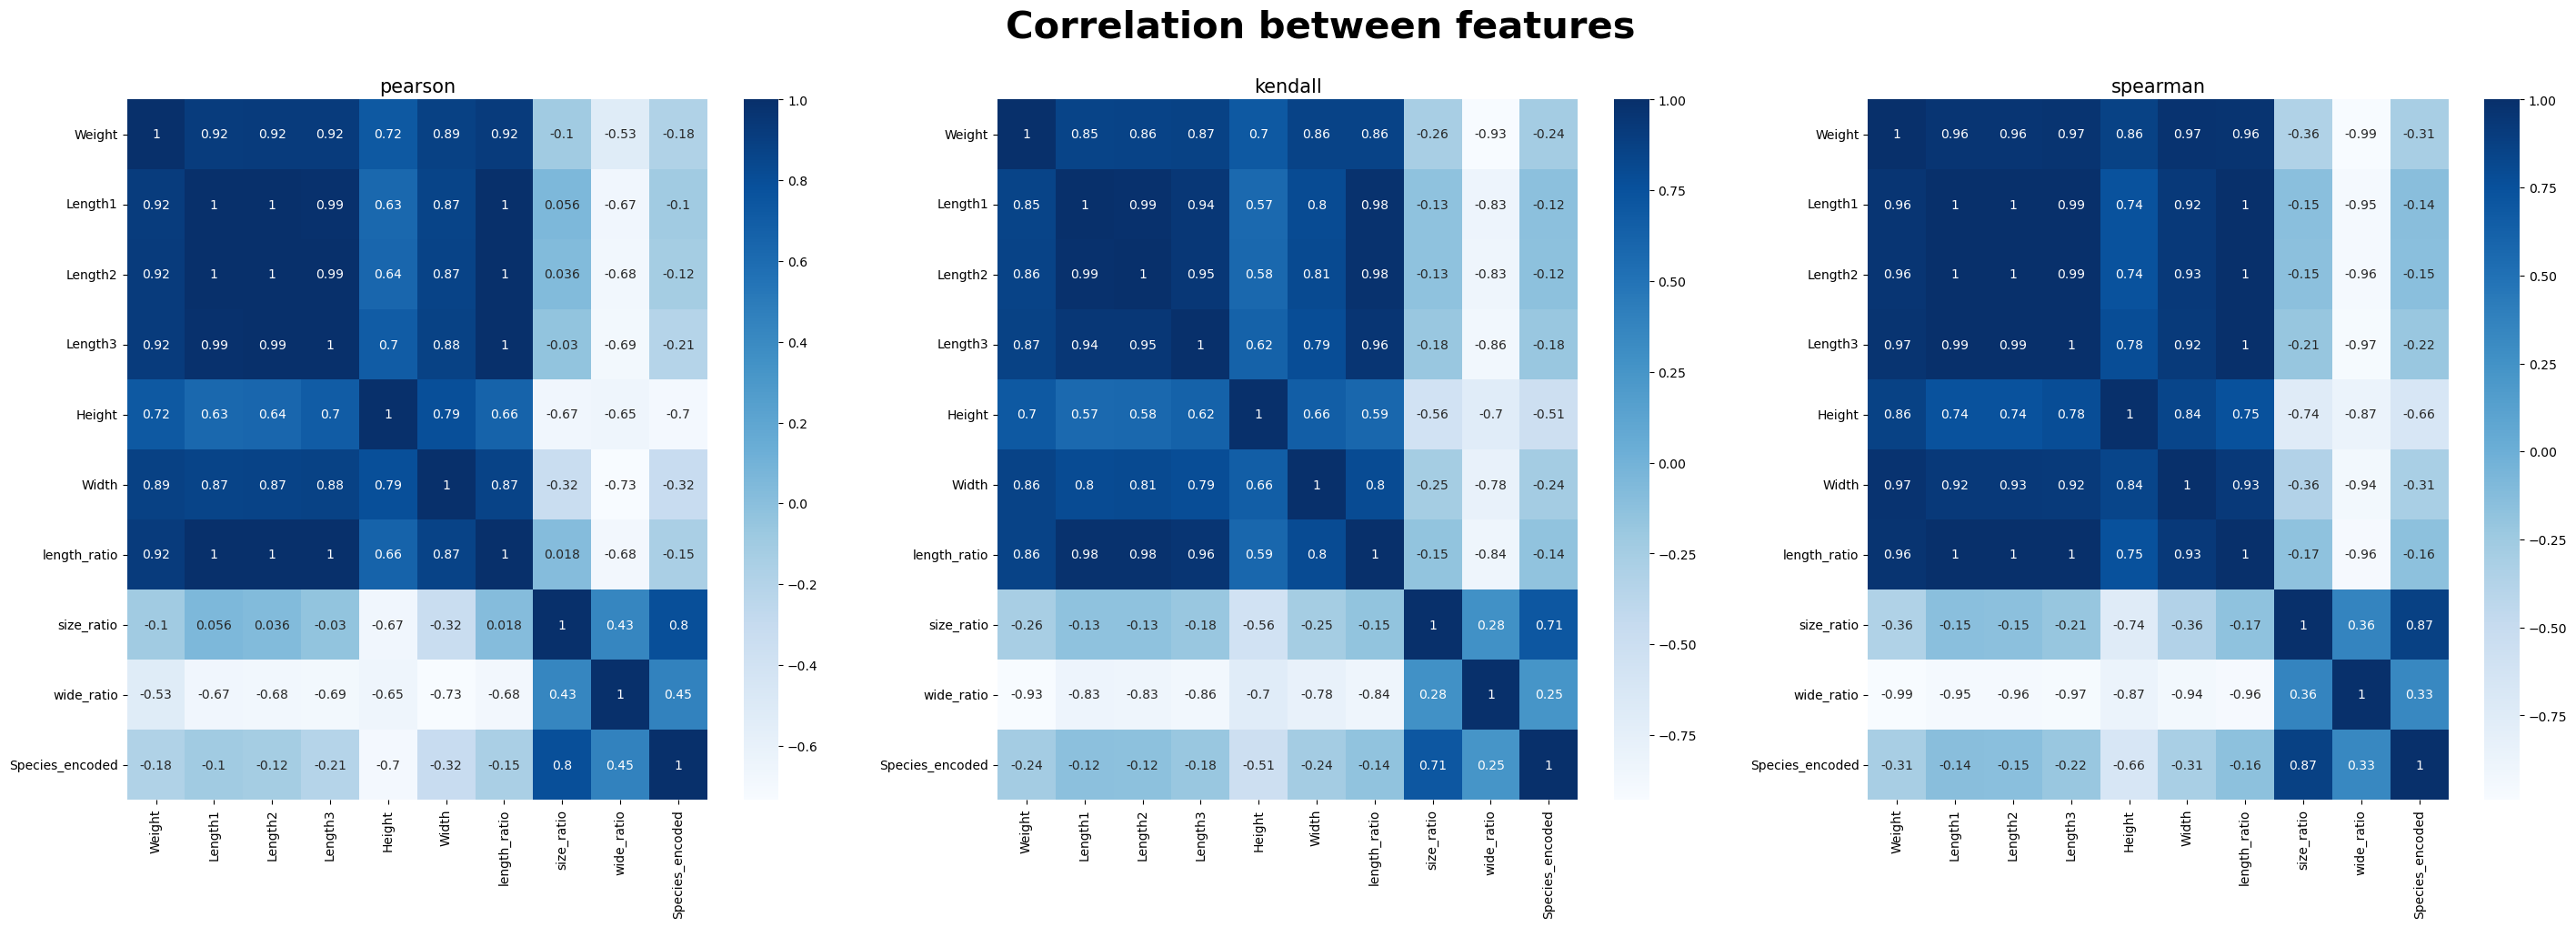

In [34]:
plt.figure(figsize=(35, 10))
plt.subplot(1, 3, 1)
sns.heatmap(df.corr(numeric_only=True, method='pearson'), annot=True, cmap='Blues')
plt.title('pearson', size=15)
plt.subplot(1, 3, 2)
sns.heatmap(df.corr(numeric_only=True, method='kendall'), annot=True, cmap='Blues')
plt.title('kendall', size=15)
plt.subplot(1, 3, 3)
sns.heatmap(df.corr(numeric_only=True, method='spearman'), annot=True, cmap='Blues')
plt.title('spearman', size=15)
plt.suptitle('Correlation between features', size=30, weight='bold')
plt.show()

- most of the pair corr has good corr, almost all of em above 0.7
- so the bigger means longer, havier and wider or vice versa
- `size_ratio` and `height` has the highest corr with the species

<Figure size 1500x1000 with 0 Axes>

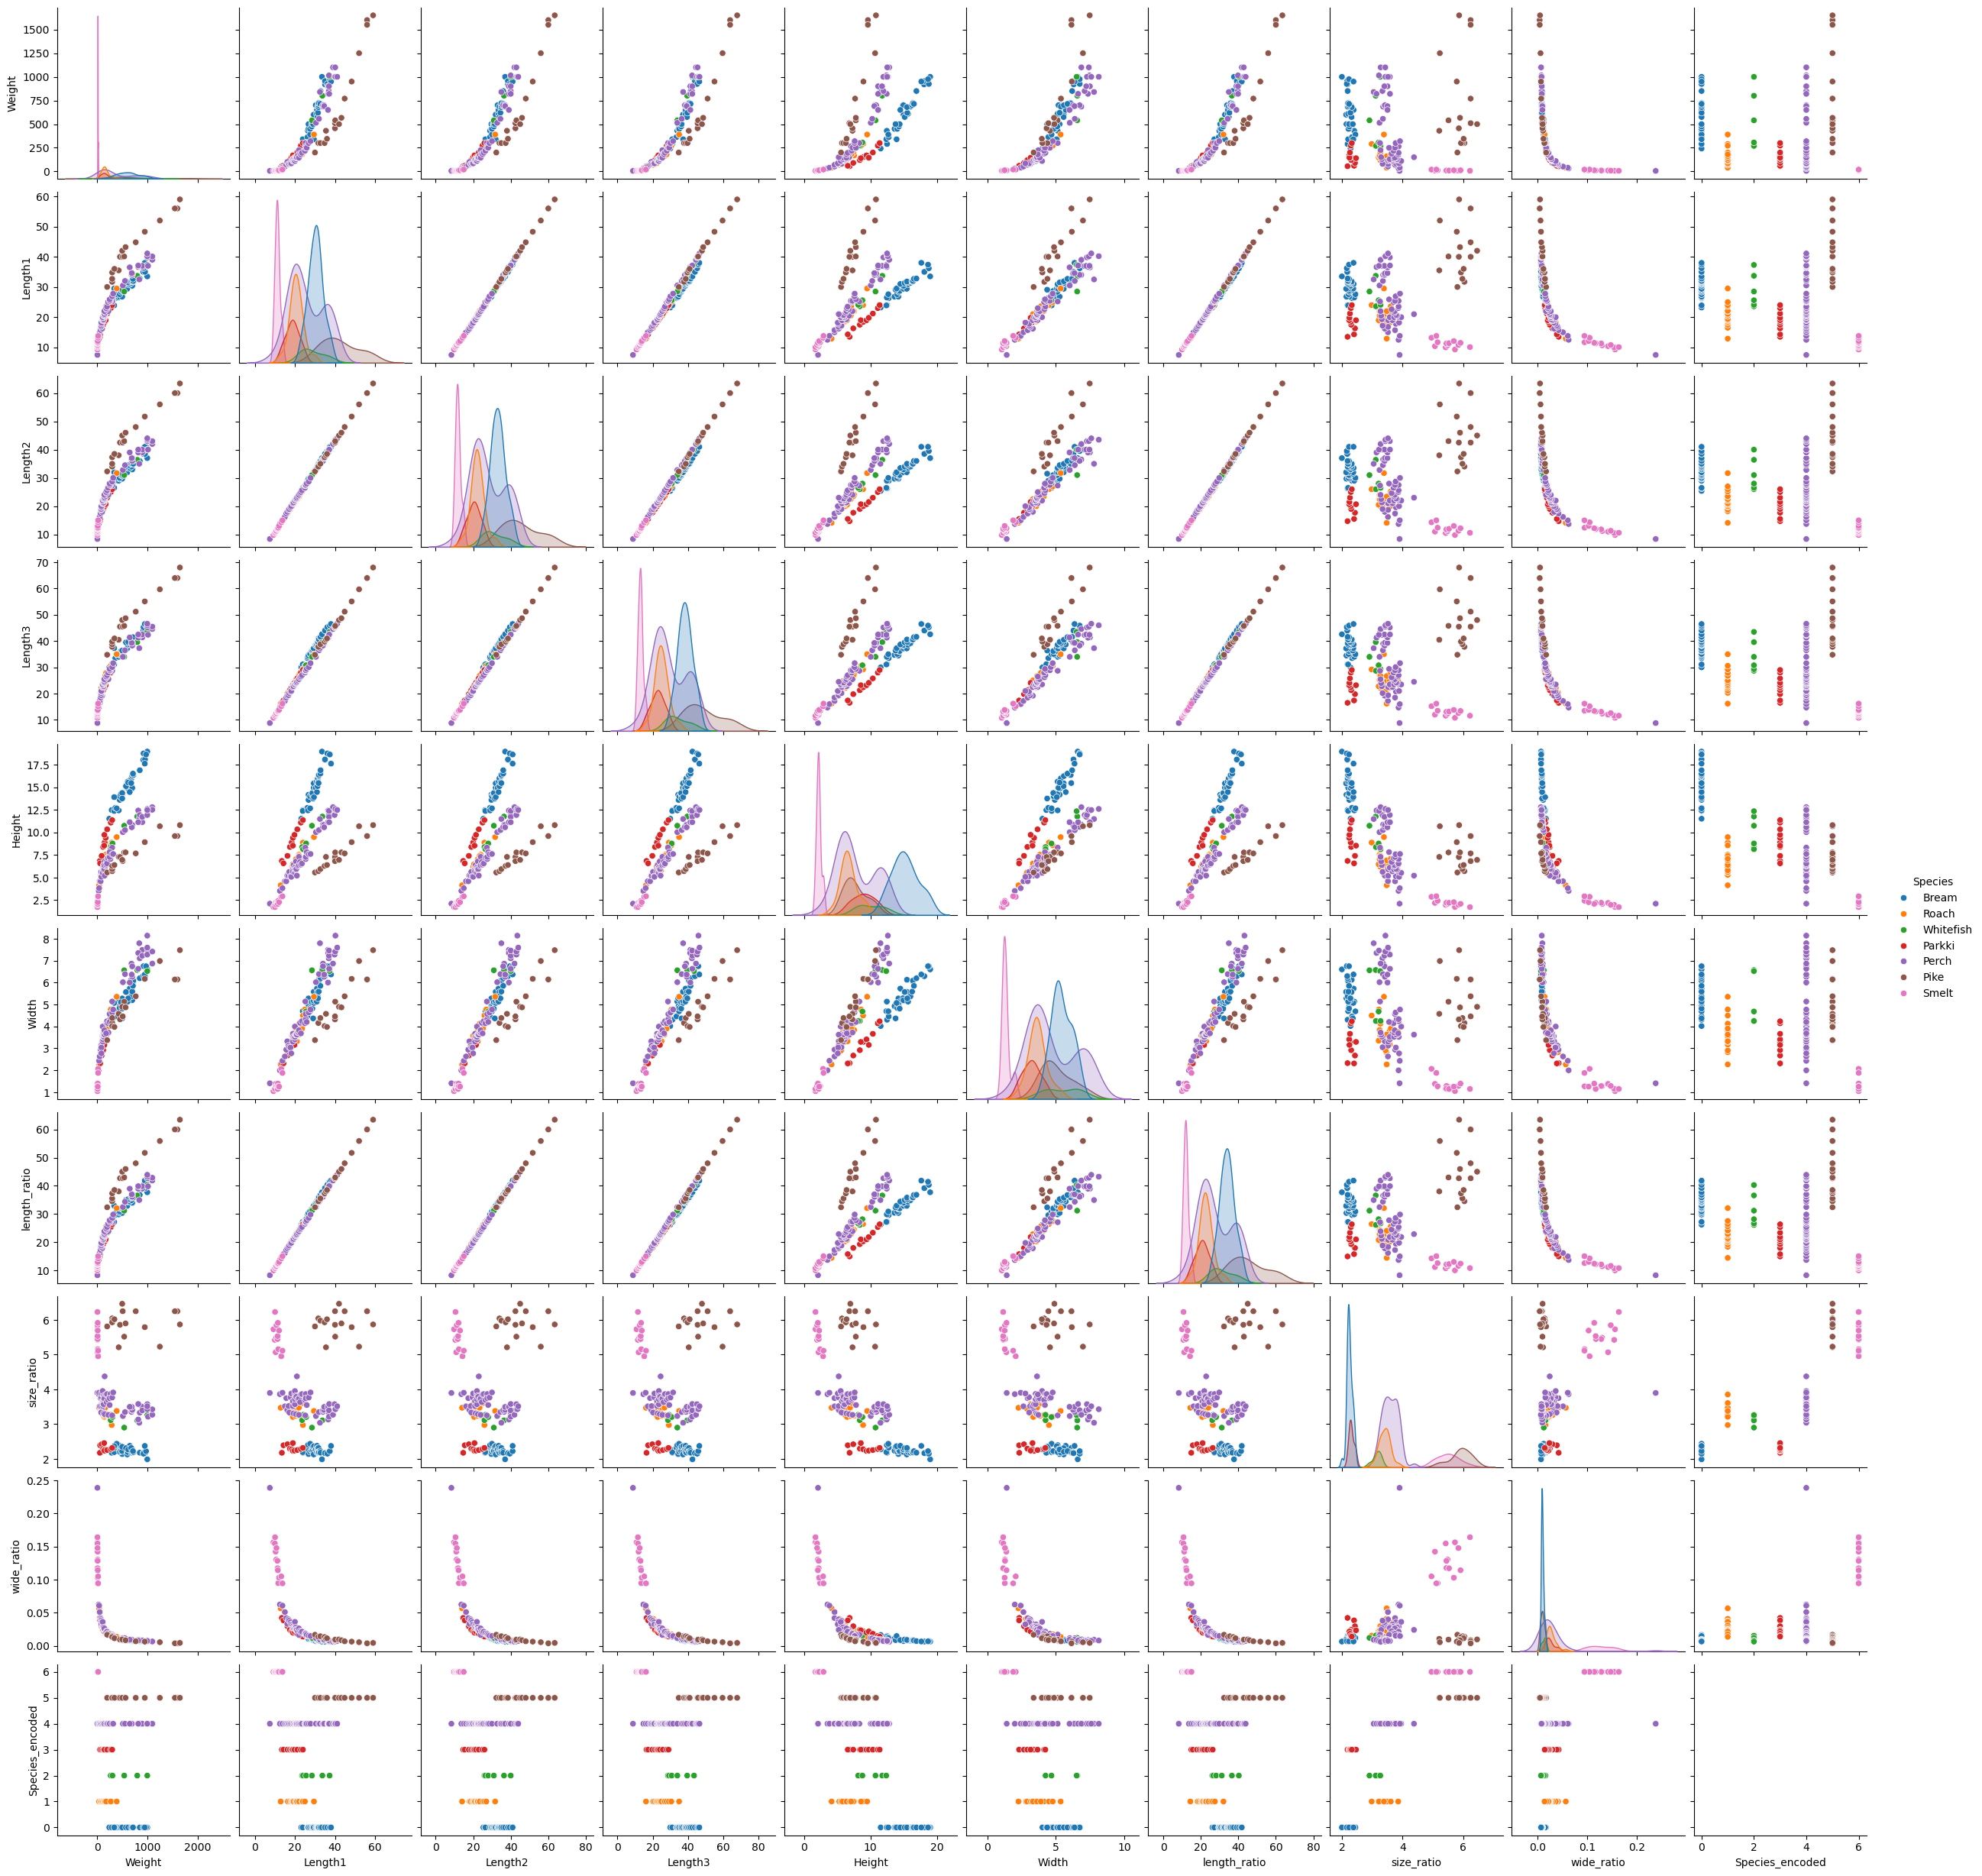

In [35]:
plt.figure(figsize=(15, 10))
sns.pairplot(data=df, hue='Species')
plt.show()

- `Pike` really stands out in lengths, it has higher length than any one, but lower hieght, means it is wider horizontally
- `Bream` and `Parkki` stands out in higeht, it tend to be higher in height, means it is wider vertically

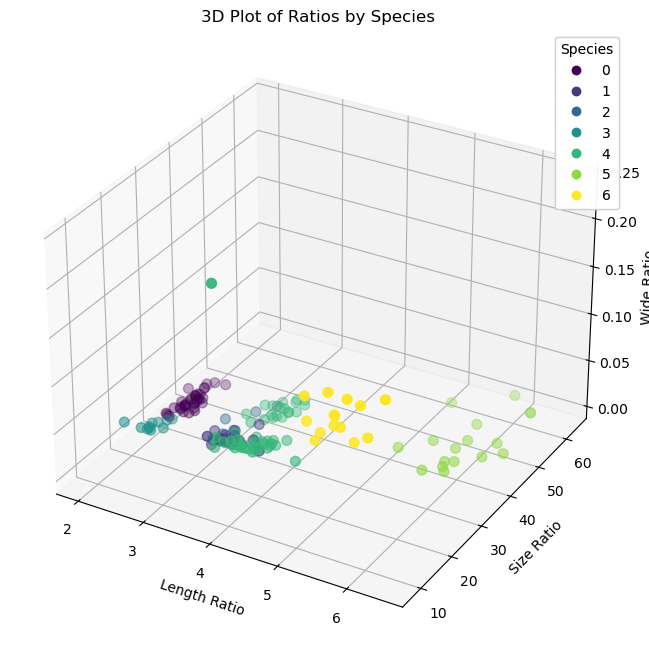

In [36]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['size_ratio']
y =  df['length_ratio'] 
z = df['wide_ratio']
species = df['Species']
 
species_unique = species.unique()
species_to_num = {species: num for num, species in enumerate(species_unique)}
species_num = species.map(species_to_num)

scatter = ax.scatter(x, y, z, c=species_num, cmap='viridis', s=50)

ax.set_xlabel('Length Ratio')
ax.set_ylabel('Size Ratio')
ax.set_zlabel('Wide Ratio')
ax.set_title('3D Plot of Ratios by Species')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend1)

plt.show()

## Feature Selection

variance analysis

In [37]:
df.var(numeric_only=True)

Weight             127541.596170
Length1                99.928837
Length2               114.839688
Length3               134.797808
Height                 18.371576
Width                   2.841935
length_ratio          115.706290
size_ratio              1.492721
wide_ratio              0.001403
Species_encoded         4.105883
dtype: float64

`weight` and `length3` has the highest variances, we can use this for modelling later

In [38]:
bins = int(np.log(len(df) + 1))
bins 

5

In [39]:
def mutual_information(table_contingency):
    expected = np.array(table_contingency.iloc[:-1, :-1])
    ratios = expected / np.sum(expected)
    Px = np.sum(ratios, axis=1, keepdims=True)
    Py = np.sum(ratios, axis=0, keepdims=True)
    nonzero = ratios > 0 
    MI = np.sum(ratios[nonzero] * np.log( ratios[nonzero] / (Px @ Py)[nonzero] ))
    return MI 

for col in df.select_dtypes(include='number'):
    X = np.array(df[col])
    X = np.digitize(X, bins=np.linspace(X.min(), X.max(), bins))
    X_df = pd.DataFrame(X.T)
    cross_tab = pd.crosstab(X_df[0], df['Species'])
    MI = mutual_information(cross_tab)
    print(f'{col} MI: {MI}')

Weight MI: 0.3162702732665273
Length1 MI: 0.40223838183379673
Length2 MI: 0.39448331160779526
Length3 MI: 0.3962471381297954
Height MI: 0.5614388972543269
Width MI: 0.47055106467238783
length_ratio MI: 0.3882254770346896
size_ratio MI: 0.9626646751024553
wide_ratio MI: 0.30738176317319826
Species_encoded MI: 0.9756080515771931


`size_ratio` and `height` has the highest MI, meaning it contribute and appear consistently with the species


In [40]:
def accuracy_calc(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test) * 100

def cross_validation(X, y, model, k=5):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    fold_size = n_samples // k 
    accuracies = []
    
    for i in range(k):
        test_start = i * fold_size
        test_end = test_start + fold_size if i < k - 1 else n_samples 
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])
        
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_calc(y_pred, y_test)
        accuracies.append(accuracy)
        
    data = {
        'X_train': X_train, 'X_test': X_test,
        'y_train': y_train, 'y_test': y_test,
        'y_pred': y_pred, 'accuracies': accuracies
    }
    
    return data 

## **Modelling** 📈

In [41]:
import itertools
from collections import Counter 
list_duo_features = list(itertools.combinations(df.drop(['Species', 'Species_encoded'], axis=1).columns, 2))
list_trio_features = list(itertools.combinations(df.drop(['Species', 'Species_encoded'], axis=1).columns, 3))

In [42]:
def eucliden(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan(a, b):
    return np.sum(np.abs(a - b))

def minkowski(a, b, p=1.5):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

In [43]:
class KNN:
    def __init__(self, k=3, distance=eucliden):
        self.k = k 
        self.distance = distance 
        
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.X_train = X_train
        self.y_train = y_train 
        
    def predict(self, X):
        predictions = [max(self._predict(x)) for x in X ]
        return predictions
    
    def _predict(self, x):
        distances = [ self.distance(x, x_train) for x_train in self.X_train ]
        indices = np.argsort(distances)[:self.k]
        votes = [ self.y_train[i] for i in indices ]
        votes_counter = Counter(votes)
        return votes_counter

In [44]:
model = KNN()
data = cross_validation(np.array(df['Weight']), np.array(df['Species']), model, k=4)
train = len(data['X_train']) / len(df) * 100
test = len(data['X_test']) / len(df) * 100
print(f'Train size: {round(train)}%, test size: {round(test)}%')

Train size: 74%, test size: 26%


## `Scenario 1`: Searching for the best duo

In [45]:
print(list_duo_features[:5])
print(f'Total Combinition: {len(list_duo_features)}')

[('Weight', 'Length1'), ('Weight', 'Length2'), ('Weight', 'Length3'), ('Weight', 'Height'), ('Weight', 'Width')]
Total Combinition: 36


In [46]:
y = np.array(df_clean['Species'])

In [47]:
accuracies = []
for duo in list_duo_features:
    duo = list(duo)
    X = np.array(df_clean[duo])
    data = cross_validation(X, y, model, k=4)
    accuracy = np.mean(data['accuracies'])
    accuracies.append(accuracy) 

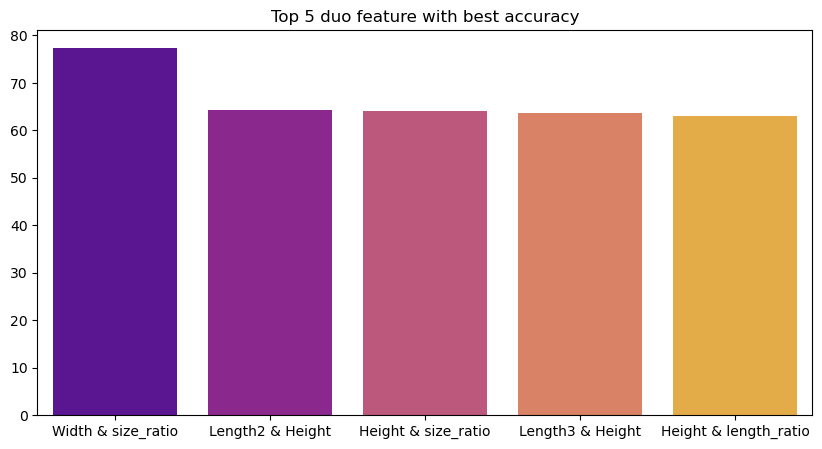

[77.24358974 64.19413919 64.05677656 63.64468864 63.003663  ]


In [48]:
accuracy_indices = np.argsort(accuracies)[::-1]
duo_accuracy = np.array(accuracies)[accuracy_indices][:5]
duo_name = np.array(list_duo_features)[accuracy_indices][:5]
duo_name = [' & '.join(duo) for duo in duo_name]

plt.figure(figsize=(10, 5))
sns.barplot(x=duo_name, y=duo_accuracy, hue=duo_name, palette='plasma')
plt.title('Top 5 duo feature with best accuracy')
plt.show()
print(duo_accuracy)

`width` and `size_ratio` has the best combo with accuracy `78%`

## `Scenario 2`: Searching for the best trio

In [49]:
print(list_trio_features[:5])
print(f'Total Combinition: {len(list_trio_features)}')

[('Weight', 'Length1', 'Length2'), ('Weight', 'Length1', 'Length3'), ('Weight', 'Length1', 'Height'), ('Weight', 'Length1', 'Width'), ('Weight', 'Length1', 'length_ratio')]
Total Combinition: 84


In [50]:
accuracies = []
for trio in list_trio_features:
    trio = list(trio)
    X = np.array(df_clean[trio])
    data = cross_validation(X, y, model, k=4)
    accuracy = np.mean(data['accuracies'])
    accuracies.append(accuracy) 

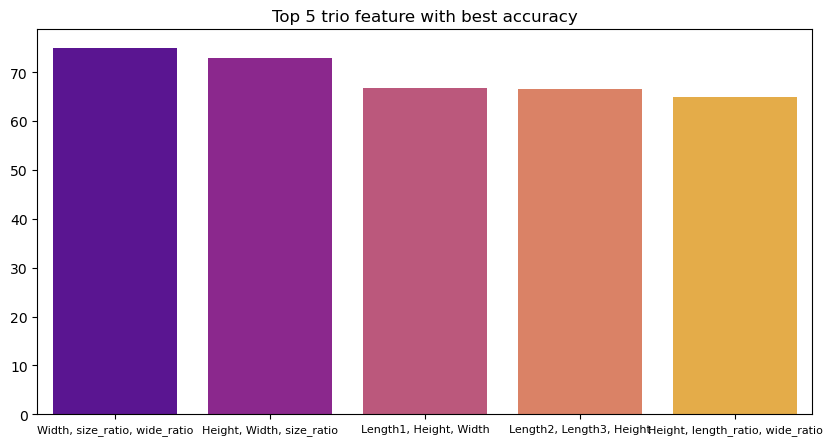

[75.         72.84798535 66.71245421 66.57509158 64.97252747]


In [51]:
accuracy_indices = np.argsort(accuracies)[::-1]
trio_accuracy = np.array(accuracies)[accuracy_indices][:5]
trio_name = np.array(list_trio_features)[accuracy_indices][:5]
trio_name = [', '.join(trio) for trio in trio_name]

plt.figure(figsize=(10, 5))
sns.barplot(x=trio_name, y=trio_accuracy, hue=trio_name, palette='plasma')
plt.title('Top 5 trio feature with best accuracy')
plt.xticks(size=8)
plt.show()
print(trio_accuracy)

`Width`, `size_ratio`, `wide_ratio`, has the best combo with 68%

## `Scenario 3`: Size ratio and height (corr analysis and mutual information)

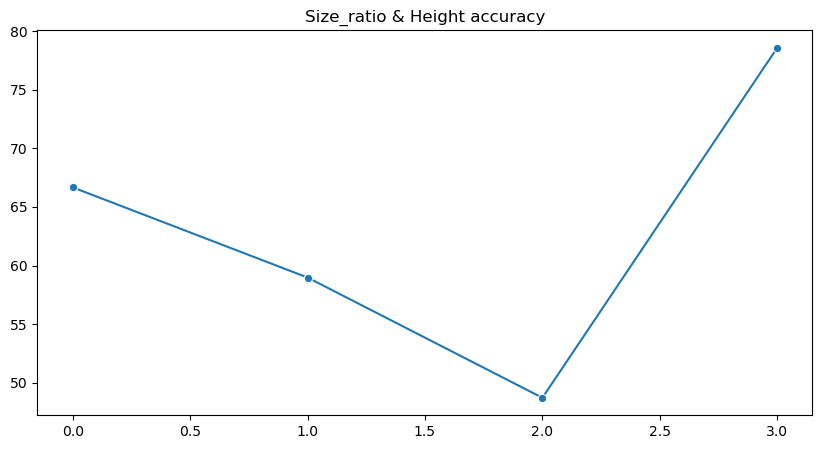

Mean: 63.23260073260073


In [52]:
X = np.array(df_clean[['size_ratio', 'Height']])
data = cross_validation(X, y, model, k=4)
plt.figure(figsize=(10, 5))
sns.lineplot(data['accuracies'], marker='o')
plt.title('Size_ratio & Height accuracy')
plt.show()
accuracy = np.mean(data['accuracies'])
print(f'Mean: {accuracy}')

the `accuracy` is lower from the **width** and **size_ratio** 

## `Scenario 4`: Weight and Length3 (variance analysis)

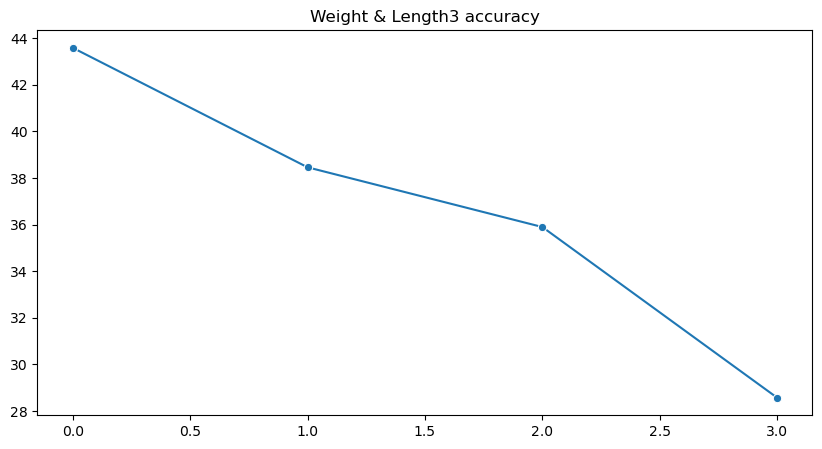

Mean: 36.63003663003663


In [53]:
X = np.array(df_clean[['Weight', 'Length3']])
data = cross_validation(X, y, model, k=4)
plt.figure(figsize=(10, 5))
sns.lineplot(data['accuracies'], marker='o')
plt.title('Weight & Length3 accuracy')
plt.show()
accuracy = np.mean(data['accuracies'])
print(f'Mean: {accuracy}')

the `accuracy` is lower from the **Weight** and **Length3** 

## `Scenario 5`: Standard Scaled 

In [54]:
def standard_scalar(data):
    return (data - data.mean()) / data.std()

df_standard = df_clean.copy()
selected_columns = df_standard.select_dtypes(include='number').columns
df_standard[selected_columns] = df_standard[selected_columns].apply(standard_scalar)
df_standard.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,length_ratio,size_ratio,wide_ratio
0,Bream,-0.432372,-0.295102,-0.269541,-0.096280,0.594700,-0.235784,-0.214108,-1.080805,-0.329479
1,Bream,-0.280538,-0.208571,-0.178807,0.009968,0.818674,-0.066369,-0.118426,-1.163226,-0.376699
2,Bream,-0.122378,-0.219388,-0.158643,0.001114,0.794830,0.165271,-0.118426,-1.148031,-0.404390
3,Bream,-0.049625,0.040204,0.093398,0.213608,0.877001,0.022550,0.122431,-1.037763,-0.445543
4,Bream,0.162310,0.061837,0.093398,0.257878,0.810275,0.425028,0.145526,-0.976730,-0.454495


In [55]:
accuracies = []
for duo in list_duo_features:
    duo = list(duo)
    X = np.array(df_standard[duo])
    data = cross_validation(X, y, model, k=4)
    accuracy = np.mean(data['accuracies'])
    accuracies.append(accuracy) 

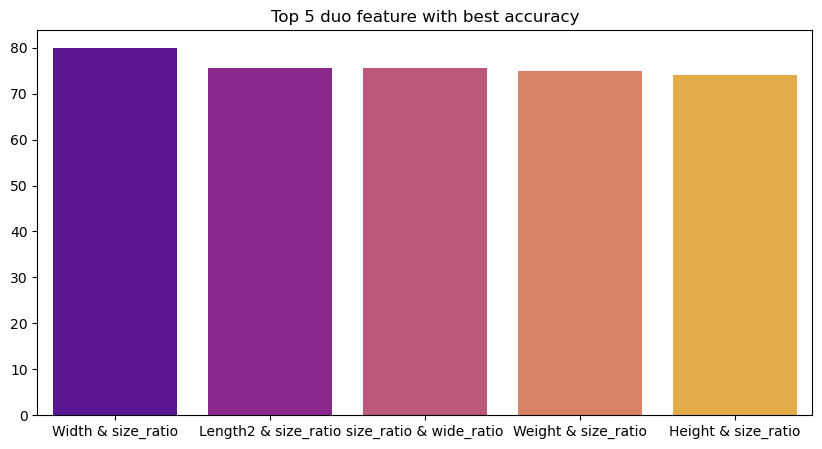

[79.85347985 75.54945055 75.503663   75.         74.08424908]


In [56]:
accuracy_indices = np.argsort(accuracies)[::-1]
duo_accuracy = np.array(accuracies)[accuracy_indices][:5]
duo_name = np.array(list_duo_features)[accuracy_indices][:5]
duo_name = [' & '.join(duo) for duo in duo_name]

plt.figure(figsize=(10, 5))
sns.barplot(x=duo_name, y=duo_accuracy, hue=duo_name, palette='plasma')
plt.title('Top 5 duo feature with best accuracy')
plt.show()
print(duo_accuracy)

no significant diff with the scenario 1, but has a slightly higher accuracy

## `Hyperparameter Tuning`: neighbors and distance 

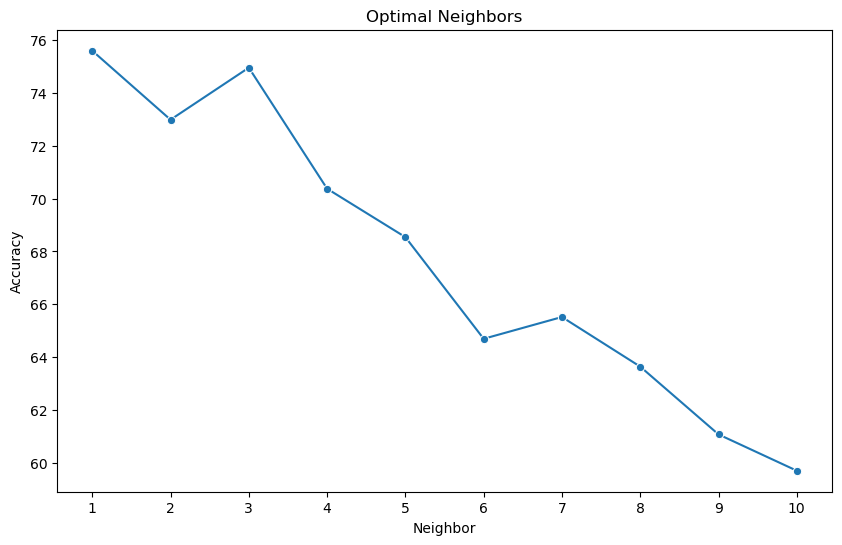

In [57]:
X = np.array(df_standard[['size_ratio', 'wide_ratio']])
accuracies = []
for neighbor in range(1, 11):
    model = KNN(k=neighbor)
    data = cross_validation(X, y, model, k=4)
    accuracies.append(np.mean(data['accuracies']))
plt.figure(figsize=(10, 6))
sns.lineplot(accuracies, marker='o')
plt.xticks(range(0, 10, 1), range(1, 11, 1))
plt.ylabel('Accuracy')
plt.xlabel('Neighbor')
plt.title('Optimal Neighbors')
plt.show()

- 1 has the highest in accuracy, but it would be bias when there's outlier
- even number can make a tie, we should avoid this
- 3 is perfect

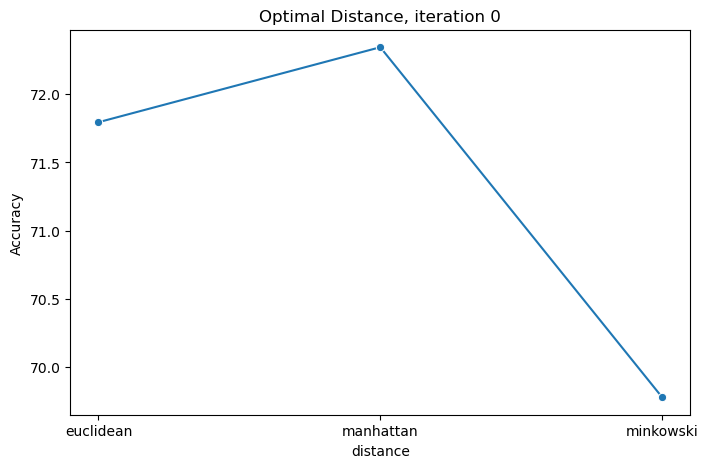

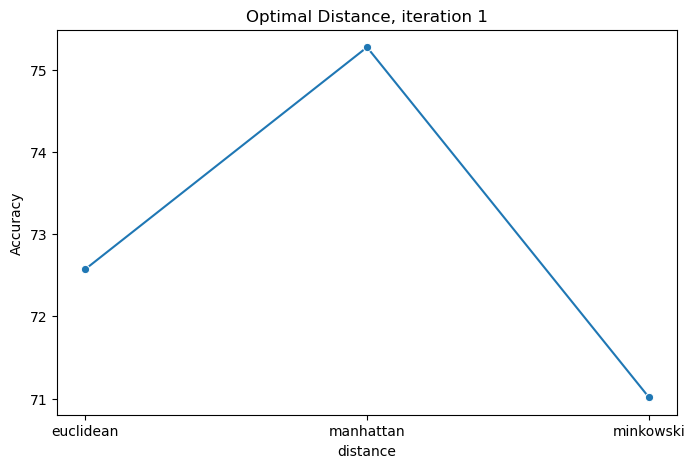

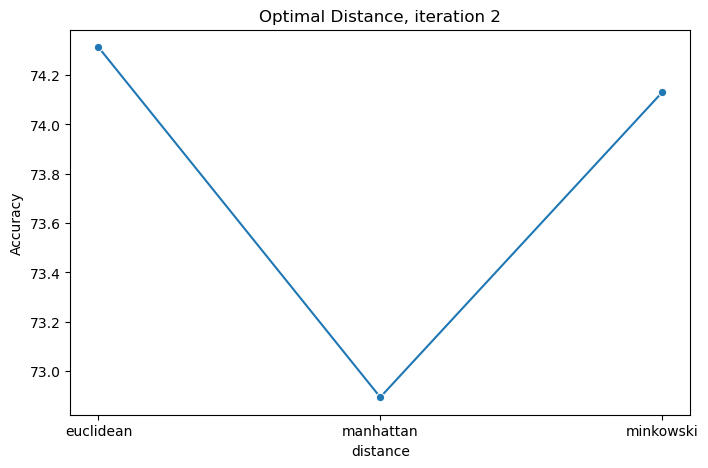

In [58]:
X = np.array(df_standard[['size_ratio', 'wide_ratio']])

for i in range(3):
    accuracies = []
    for distance in [eucliden, manhattan, minkowski]:
        model = KNN(k=3, distance=distance)
        data = cross_validation(X, y, model, k=4)
        accuracies.append(np.mean(data['accuracies']))
    plt.figure(figsize=(8, 5))
    sns.lineplot(accuracies, marker='o')
    plt.xticks(range(0, 3, 1), ['euclidean', 'manhattan', 'minkowski'])
    plt.ylabel('Accuracy')
    plt.xlabel('distance')
    plt.title(f'Optimal Distance, iteration {i}')
    plt.show()

manhattan gives the best accuracy

In [59]:
X = np.array(df_standard[['Width', 'size_ratio']])
y = np.array(df_standard['Species'])

In [60]:
model = KNN(k=3, distance=manhattan)
data = cross_validation(X, y, model, k=4)

In [61]:
data['accuracies']

[76.92307692307693, 84.61538461538461, 79.48717948717949, 83.33333333333334]

## `New Instance`

In [62]:
class standardScalar:
    def __init__(self):
        self.data = None 
        self.mean = None 
        self.std = None 
        
    def fit(self, data):
        self.data = data 
        self.mean = np.mean(data)
        self.std = np.std(data)
        
    def transform(self, x):
        return (x - self.mean) / self.std

In [63]:
# input
neighbor = int(input('Neighbor: '))
distance = int(input('(0) Euclidean (1) Manhattan (2) Minkwoski: '))
width = float(input('Width: '))
size_ratio = float(input('size ratio: '))


# distances
if distance == 0:
    model = KNN(k=neighbor, distance=eucliden)
elif distance == 1:
    model = KNN(k=neighbor, distance=manhattan)
elif distance == 2:
    model = KNN(k=neighbor, distance=minkowski)



# parameter and new instance imputation
data = cross_validation(X, y, model, k=4)

standard = standardScalar()
standard.fit(df['Width'])
width_standard = standard.transform(width)

standard.fit(df['size_ratio'])
size_ratio_standard = standard.transform(size_ratio)

new_instance = np.array([width_standard, size_ratio_standard])
predict = model._predict(new_instance)
confidence = round(max(predict.values()) / neighbor * 100, 2) # confidence score = max class count / k * 100
distance = np.mean([ eucliden(new_instance, x_train) for x_train in data['X_train'] ]) # see how far new instance to the train set

 
# Print out information
print(f'Predict: {predict}')
print(f'Confidence Score: {confidence}%')
print(f'Avg Distance to training set: {distance}')
print(f'New Instance: {new_instance}')


# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['X_train'][:, 0], y=data['X_train'][:, 1], hue=data['y_train'])
sns.scatterplot(x=np.array([width_standard]), y=np.array([size_ratio_standard]), c='black', marker='x', s=250, legend=True)
plt.xlabel('width')
plt.ylabel('size_ratio')
plt.title('New Instance Input (X)', size=22, weight='bold')
plt.show()

ValueError: invalid literal for int() with base 10: ''

## **Conclusion** 📈🐟
Scenarios:
1. `Best`: standardized width & size_ratio 
2. `Med`: width, size_ratio, wide_ratio
3. `low`: size_ratio and height (corr & mutual information)
4. `bad`: weight and length3 (variance analysis)

Hyperparameter:
1. `K` = 3
2. `distance` = manhattan

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd 
import numpy as np
import tkinter as tk 
import seaborn as sns
import os
from tkinter import messagebox, ttk

class FishTypePredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Fish Species Prediction App")
        self.root.attributes('-fullscreen', True)
        self.history_file = 'history.pkl'
        self.history = self.load_history_from_pickle()
        
        self.tab_control = ttk.Notebook(root)
        self.predict_tab = ttk.Frame(self.tab_control, padding="50")
        self.history_tab = ttk.Frame(self.tab_control, padding="50")
        self.setting_tab = ttk.Frame(self.tab_control, padding="50")
        
        style = ttk.Style()
        style.configure('TNotebook.Tab', padding=[40, 15], font=('Poppins', 15))
        
        self.tab_control.add(self.predict_tab, text="Predict")
        self.tab_control.add(self.history_tab, text="History")
        self.tab_control.add(self.setting_tab, text="Setting")
        self.tab_control.pack(fill='x', anchor='w')
            
        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()
        self.scenario_frame = ttk.Frame(self.setting_tab)
        self.scenario_frame.grid(column=0, row=5, sticky='w')
        self.update_setting()  # Ensure input fields are created
        
    def create_input_field(self, parent, label_text, description_text, column, row, default_value=""):
        ttk.Label(parent, text=label_text, font=('Poppins medium', 15)).grid(column=column, row=row, sticky='w', padx=(0, 30))
        entry = ttk.Entry(parent, font=('Poppins', 16))
        entry.insert(0, default_value)
        entry.grid(column=column, row=row+1, sticky='w', padx=(0, 30))
        ttk.Label(parent, text=description_text, font=('Poppins light', 10)).grid(column=column, row=row+2, sticky='w', padx=(0, 30))
        setattr(self, f"{label_text.lower().replace(' ', '_')}_entry", entry)

    def get_input_value(self, label_text):
        entry = getattr(self, f"{label_text.lower().replace(' ', '_')}_entry")
        return entry.get()
        
    def init_predict_tab(self):
        ttk.Label(self.predict_tab, text="Fish Species Prediction App", font=('Poppins medium', 30)).grid(column=0, row=0, sticky='w', columnspan=2)
        ttk.Label(self.predict_tab, text="Get precise species with KNN (K-Nearest Neighbor Algorithm)", font=('Poppins', 15)).grid(column=0, row=1, sticky='w', columnspan=2)
        
        self.frame_input = ttk.Frame(self.predict_tab)
        self.frame_input.grid(column=0, row=2, sticky='w', columnspan=2)

        ttk.Button(self.predict_tab, text="Go Predict", command=self.predict_and_plot, padding="10").grid(column=0, row=2, sticky='w', pady=(150,0))
        
        self.predict_result = ttk.Frame(self.predict_tab)
        self.predict_result.grid(column=1, row=4, sticky='w',)
        
        self.figure = plt.Figure(figsize=(7, 5), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.canvas = FigureCanvasTkAgg(self.figure, self.predict_tab)
        self.canvas.get_tk_widget().grid(column=0, row=4, sticky='w', )

    def predict_and_plot(self):
        self.ax.clear()
        
        for widget in self.predict_result.winfo_children():
            widget.grid_forget()
        def parse_input(label):
            try:
                return float(self.get_input_value(label))
            except:
                return 0.0

        length1_value = parse_input("Length 1")
        length2_value = parse_input("Length 2")
        length3_value = parse_input("Length 3")
        height_value = parse_input("Height")
        width_value = parse_input("Width")
        weight_value = parse_input("Weight")
        
        length_ratio = np.mean([length1_value, length2_value, length3_value])
        size_ratio = length_ratio / height_value if height_value != 0 else 0
        wide_ratio = weight_value / width_value if width_value != 0 else 0
        k_value = int(self.k_value_entry.get())
        
        distance_mapping = {
            "Euclidean": eucliden,
            "Manhattan": manhattan,
            "Minkowski": minkowski
        }
        model = KNN(k_value, distance=distance_mapping[self.distance_select.get()])

        # parameter and new instance imputation

        scenario = self.scenario_select_var.get()
        
        if scenario == 'Best':
            new_instance = np.array([width_value, size_ratio])
            x_col, y_col = 'Width', 'size_ratio' 
            X = np.array(  df[['Width','size_ratio']] )
            x_val, y_val = width_value, size_ratio 
        elif scenario == 'Medium':
            new_instance = np.array([width_value, size_ratio, wide_ratio])
            x_col, y_col, z_col = 'Width', 'size_ratio', 'wide_ratio'
            X = np.array( df[['Width','size_ratio','wide_ratio']])
            x_val, y_val, z_val = width_value, size_ratio, wide_ratio
        elif scenario == 'Low':
            new_instance = np.array([height_value, size_ratio])
            x_col, y_col = 'Height', 'size_ratio'
            X = np.array( df[['Height','size_ratio']] )
            x_val, y_val = height_value, size_ratio
        
        # 1. width & size_ratio
        # 2. Width, size _ratio, wide_ratio
        # 3. size_ratio & height    
           
        data = cross_validation(X, y, model, k=4)
        predict_detail = model._predict(new_instance)
        confidence = round(max(predict_detail.values()) / k_value * 100, 2)
        
        if confidence == 100:
            self.message = "Perfect, kamu dapet hasil yang identik ✅"
        elif 50 <= confidence < 100:
            self.message = "wah ternyata ada kelas lain yang serupa 🤔"
        else:
            self.message = "Wow, hasil prediksimu banyak kemiripan🤨😵‍💫"
            
        ttk.Label(self.predict_tab, text="Summarize Prediction", font=('Poppins', 15)).grid(column=0, row=3, sticky='w',)
        ttk.Label(self.predict_tab, text=self.message, font=('Poppins medium', 20)).grid(column=0, row=3, sticky='w', pady=(80,0))
        
        if self.scenario_select_var.get() == 'Medium':
            self.figure.clf()
            self.ax = self.figure.add_subplot(111, projection='3d')
            species_codes = pd.Categorical(data['y_train']).codes
            self.ax.scatter(data['X_train'][:, 0], data['X_train'][:, 1], data['X_train'][:, 2], c=species_codes, cmap='viridis', marker='o', label='Species')
            self.ax.scatter(x_val, y_val, z_val, color='red', marker='x', s=100, label="Your Prediction")
            self.ax.set_xlabel(x_col)
            self.ax.set_ylabel(y_col)
            self.ax.set_zlabel(z_col)
        else:
            sns.scatterplot(x=data['X_train'][:, 0], y=data['X_train'][:, 1], hue=data['y_train'], ax=self.ax)
            sns.scatterplot(x=[x_val], y=[y_val], color='red', marker='x', ax=self.ax, s=100, label="Your Prediction")
            self.ax.set_xlabel(x_col)
            self.ax.set_ylabel(y_col)

        self.canvas.draw()
        
        new_row = pd.DataFrame({   
            'predict': [max(predict_detail)],
            'predict_detail': [dict(predict_detail)],
            'confidence_score': [confidence],
            'timestamp': [pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')],
            'scenario': [self.scenario_select_var.get()],
            'length1': [length1_value],
            'length2': [length2_value],
            'length3': [length3_value],
            'height': [height_value],
            'width': [width_value],
            'weight': [weight_value],
            'length_ratio': [length_ratio],
            'wide_ratio': [wide_ratio],
            'size_ratio': [size_ratio],
            'k_value': [k_value],
            'distance': [self.distance_select.get()],
            'scaling_status': [False],
        })
        self.history = pd.concat([self.history, new_row], ignore_index=True)
        self.update_history()
        
        ttk.Label(self.predict_result, text="Prediction Result", font=('Poppins medium', 23)).grid(column=0, row=0, sticky='w')    
        
        row = 1
        col = 0
        for column, value in new_row.items():
            label_title = column.replace('_', ' ').title()
            label_value = value[0]
            ttk.Label(self.predict_result, text=label_title, font=('Poppins light', 8)).grid(column=col, row=row, sticky='w')
            ttk.Label(self.predict_result, text=label_value, font=('Poppins', 15)).grid(column=col, row=row+1, sticky='w')
            col += 1
            if col == 2:
                col = 0
                row += 2
    
    def init_history_tab(self):
        ttk.Label(self.history_tab, text="Prediction History", font=('Poppins medium', 30)).grid(column=0, row=0,  sticky='w')
        ttk.Label(self.history_tab, text="View past predictions", font=('Poppins', 15)).grid(column=0, row=1, sticky='w')
        
        self.history_tree = ttk.Treeview(self.history_tab, columns=('timestamp', 'predict', 'scenario'))
        self.history_tree.heading('timestamp', text='Timestamp')
        self.history_tree.heading('predict', text='Species Prediction')
        self.history_tree.heading('scenario', text='Scenario')
        self.history_tree.grid(column=0, row=3)
        
        ttk.Button(self.history_tab, text="Compare History", command=self.compare_history, padding="10").grid(column=0, row=5, sticky='e', pady=10)
        
        # COMPARE ============================================================================================================
        self.frame_compare1 = ttk.Frame(self.history_tab)
        self.frame_compare1.grid(column=0, row=6)        
        
        # COMPARE ============================================================================================================
        self.frame_compare2 = ttk.Frame(self.history_tab)
        self.frame_compare2.grid(column=4, row=6)
        self.update_history()
        
    def update_history(self):
        # Clear existing items
        for item in self.history_tree.get_children():
            self.history_tree.delete(item)
            
        # Add new items
        for index, row in self.history.iterrows():
            # Dynamically get values based on columns
            values = tuple(row[col] for col in self.columns)
            self.history_tree.insert('', 'end', values=values)
    def compare_history(self):
        self.selected_items = self.history_tree.selection()
        
        if len(self.selected_items) != 2:
            messagebox.showerror("Error", "Please select exactly 2 items for comparison")
            return

        # Retrieve the 'values' list from each selected item
        item1 = self.history_tree.item(self.selected_items[0], 'values')
        item2 = self.history_tree.item(self.selected_items[1], 'values')

        # Clear previous contents in comparison frames
        for widget in self.frame_compare1.winfo_children():
            widget.destroy()
        for widget in self.frame_compare2.winfo_children():
            widget.destroy()

        # Display first item data in frame_compare1
        self.columns = [
            'predict',
            'predict_detail',
            'timestamp',
            'confident_score',
            'scenario',
            'length1',
            'length2',
            'length3',
            'height',
            'width',
            'weight',
            'length_ratio',
            'wide_ratio',
            'size_ratio',
            'k_value',
            'distance',
            'scaling_status'
        ]
        
        ttk.Label(self.frame_compare1, text="Compare 1", font=('Poppins medium', 23)).grid(column=0, row=0, sticky='w')
        row = 1
        col = 0
        for index, value in enumerate(item1):
            label_title = self.columns[index]
            ttk.Label(self.frame_compare1, text=label_title.replace('_', ' ').title(), font=('Poppins light', 8)).grid(column=col, row=row, sticky='w')
            ttk.Label(self.frame_compare1, text=value, font=('Poppins', 15)).grid(column=col, row=row+1, sticky='w')
            col += 1
            if col == 2:
                col = 0
                row += 2

        ttk.Label(self.frame_compare2, text="Compare 2", font=('Poppins medium', 23)).grid(column=0, row=0, sticky='w')
        row = 1
        col = 0
        for index, value in enumerate(item2):
            label_title = self.columns[index]
            ttk.Label(self.frame_compare2, text=label_title.replace('_', ' ').title(), font=('Poppins light', 8)).grid(column=col, row=row, sticky='w')
            ttk.Label(self.frame_compare2, text=value, font=('Poppins', 15)).grid(column=col, row=row+1, sticky='w')
            col += 1
            if col == 2:
                col = 0
                row += 2
        
    def init_setting_tab(self):
        ttk.Label(self.setting_tab, text="Settings", font=('Poppins medium', 30)).grid(column=0, row=0,  sticky='w')
        ttk.Label(self.setting_tab, text="Adjust application settings", font=('Poppins', 15)).grid(column=0, row=1, sticky='w')
        
        # 1. size_ratio & wide_ratio
        # 2. Height & size_ratio
        # 3. Height, size_ratio, wide_ratio
        
        ttk.Label(self.setting_tab, text="Chosee Scenario", font=('Poppins', 15)).grid(column=0, row=2, sticky='w')
        self.scenario_select_var = tk.StringVar(value='Best')
        self.scenario_select = ttk.Combobox(self.setting_tab, values=['Best', 'Medium', 'Low'], textvariable=self.scenario_select_var, font=('Poppins', 16))
        self.scenario_select.grid(column=0, row=3, sticky='w')
        ttk.Label(self.setting_tab, text="Chosee your input, which best, medium, or low", font=('Poppins light', 10)).grid(column=0, row=4, sticky='w')
        self.scenario_select.bind("<<ComboboxSelected>>", self.update_setting)
        
        ttk.Label(self.setting_tab, text="Chosee Distance", font=('Poppins', 15)).grid(column=1, row=2, sticky='w')
        self.distance_select_var = tk.StringVar(value='Manhattan')
        self.distance_select = ttk.Combobox(self.setting_tab, values=['Minkowski', 'Euclidean', 'Manhattan'], textvariable=self.distance_select_var, font=('Poppins', 16))
        self.distance_select.grid(column=1, row=3, sticky='w')
        ttk.Label(self.setting_tab, text="how the model mearsure your prediction to train data", font=('Poppins light', 10)).grid(column=1, row=4, sticky='w')
        
        ttk.Label(self.setting_tab, text="K Value", font=('Poppins', 15)).grid(column=2, row=2, sticky='w')
        self.k_value_entry_var = tk.IntVar(value=3)
        self.k_value_entry = ttk.Entry(self.setting_tab, textvariable=self.k_value_entry_var, font=('Poppins', 16))
        self.k_value_entry.grid(column=2, row=3, sticky='w')
        ttk.Label(self.setting_tab, text="how far range of neighbor will included in modeling", font=('Poppins light', 10)).grid(column=2, row=4, sticky='w')

    def update_setting(self, event=None):
        for widget in self.scenario_frame.winfo_children():
            widget.grid_forget()
        
        for widget in self.frame_input.winfo_children():
            widget.grid_forget()
            
        # 1. width & size_ratio
        # 2. Width, size _ratio, wide_ratio
        # 3. size_ratio & height       
        
        input_labels = {
            'Best': ('Length 1', 'Length 2', 'Length 3', 'Height', 'Width'),
            'Medium': ('Length 1', 'Length 2', 'Length 3', 'Height', 'Width', 'Weight'),
            'Low': ('Length 1', 'Length 2', 'Length 3', 'Height',),
        }
        
        selected_scenario = self.scenario_select_var.get()
        labels = input_labels[selected_scenario]
        
        for i, label in enumerate(labels):
            self.create_input_field(self.frame_input, label, f"{label} in cm", i, 0)
        
    
    def load_history_from_pickle(self):
        try:
            if os.path.exists(self.history_file):
                return pd.read_pickle(self.history_file)
            else:
                new_history = pd.DataFrame(columns=self.columns)
                self.history = new_history
                self.save_to_pickle()  # Save the new file to disk
                return new_history
        except Exception as e:
            messagebox.showerror("File Error", f'Failed to load: {e}')
           
            return pd.DataFrame(columns=self.columns)

    def save_to_pickle(self):
        try:
            self.history.to_pickle(self.history_file)
        except Exception as e:
            messagebox.showerror("File Error", f'Failed to save: {e}')
            
if __name__ == "__main__":
    root = tk.Tk()
    app = FishTypePredictionApp(root)
    root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\arsya\anaconda3\envs\lks_env\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\arsya\AppData\Local\Temp\ipykernel_36692\1270180905.py", line 87, in predict_and_plot
    wide_ratio = weight_value / width_value if width_value != 0 else 0
TypeError: unsupported operand type(s) for /: 'str' and 'float'


In [ ]:
import numpy as np

def entropy(probabilities):
    return -sum(p * np.log2(p) for p in probabilities if p > 0)

def gini(probabilities):
    return 1 - sum(p ** 2 for p in probabilities)

def calculate_information_gain(dataset, target_column, feature_column, method='entropy'):
    total_size = len(dataset)
    target_counts = dataset[target_column].value_counts()
    total_entropy = entropy(target_counts / total_size) if method == 'entropy' else gini(target_counts / total_size)
    
    feature_values = dataset[feature_column].unique()
    weighted_impurity = 0
    
    for value in feature_values:
        subset = dataset[dataset[feature_column] == value]
        subset_size = len(subset)
        subset_counts = subset[target_column].value_counts()
        subset_probabilities = subset_counts / subset_size
        subset_impurity = entropy(subset_probabilities) if method == 'entropy' else gini(subset_probabilities)
        weighted_impurity += (subset_size / total_size) * subset_impurity
    
    information_gain = total_entropy - weighted_impurity
    return information_gain

# Example usage with pandas DataFrame
import pandas as pd

data = pd.DataFrame({
    'Loves Popcorn': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Loves Soda': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No'],
    'Loves Cool As Ice': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No']
})

entropy_ig_popcorn = calculate_information_gain(data, 'Loves Cool As Ice', 'Loves Popcorn', method='entropy')
entropy_ig_soda = calculate_information_gain(data, 'Loves Cool As Ice', 'Loves Soda', method='entropy')

gini_ig_popcorn = calculate_information_gain(data, 'Loves Cool As Ice', 'Loves Popcorn', method='gini')
gini_ig_soda = calculate_information_gain(data, 'Loves Cool As Ice', 'Loves Soda', method='gini')

print(f"Entropy Information Gain (Loves Popcorn): {entropy_ig_popcorn}")
print(f"Entropy Information Gain (Loves Soda): {entropy_ig_soda}")
print(f"Gini Information Gain (Loves Popcorn): {gini_ig_popcorn}")
print(f"Gini Information Gain (Loves Soda): {gini_ig_soda}")


Entropy Information Gain (Loves Popcorn): 0.12808527889139443
Entropy Information Gain (Loves Soda): 0.12808527889139443
Gini Information Gain (Loves Popcorn): 0.08503401360544227
Gini Information Gain (Loves Soda): 0.08503401360544227


: 